In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

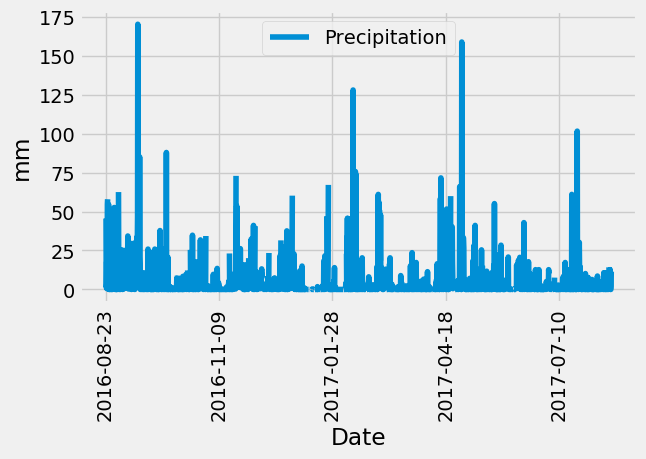

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date

# Calculate the date one year from the last date in data set.
last_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_date = session.query(measurement.date, measurement.prcp).filter(measurement.date>=last_date).all()
prcp_date

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_date, columns = ['Date','Precipitation'])
prcp_df = prcp_df.set_index('Date')

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date')
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90, label = 'precipitation')
plt.legend()
plt.yticks([0,25,50,75,100,125,150,175])
plt.tight_layout()
plt.ylabel('mm')
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station).group_by(station.name).count()
station_count

9

In [74]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [measurement.station, 
       func.count(measurement.station)]

count = func.count(measurement.station)

session.query(*sel).group_by(measurement.station).order_by(count.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [68]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_info = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).all()
active_station_info

[(11.7, 30.6, 22.8321176470585)]

Text(0, 0.5, 'Frequency')

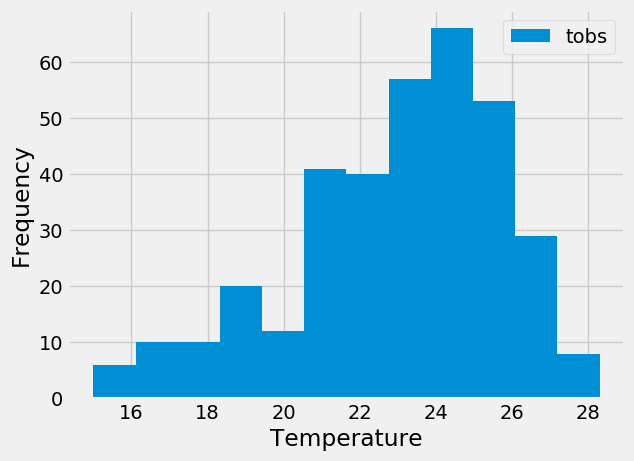

In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(measurement.date, measurement.tobs).filter(measurement.date>=last_date,measurement.station=='USC00519281').all()
station_df = pd.DataFrame(station_data, columns = ['Date','Tobs'])
plt.hist(station_df['Tobs'],bins=12,label='tobs')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [ ]:
# Close Session
session.close()